### practical 1

Loading dataset 'winequality.csv'...
Encoding 'type' column (red=0, white=1)...
Original data shape: (6497, 13)
Data shape after dropna: (6463, 13)
Features (X) shape: (6463, 12)
Target (y) shape: (6463,)
Standardizing features...
Running PCA for 2 components...
Creating PCA separation plot...
Saved 'pca_wine_separation_plot.png'

--- 2-Component PCA Info ---
Explained variance by PC1: 25.36%
Explained variance by PC2: 22.08%
Total variance explained by 2 components: 47.44%

Running PCA for all components (for Scree Plot)...
Creating Scree Plot...
Saved 'pca_wine_scree_plot.png'

Script execution complete.


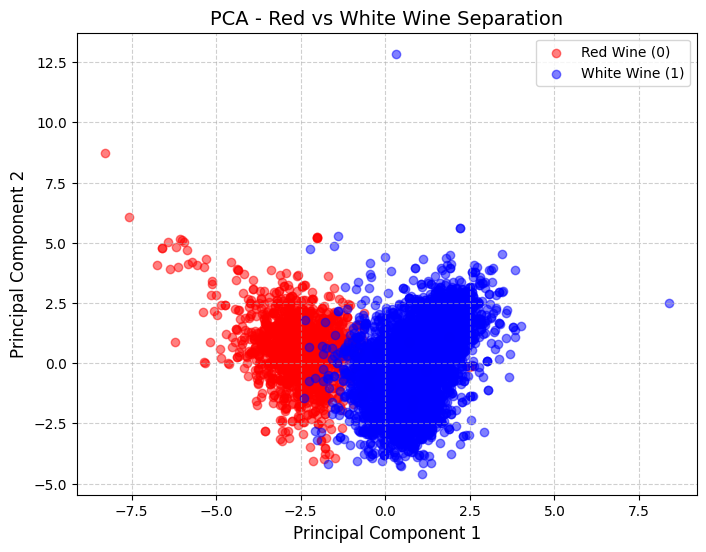

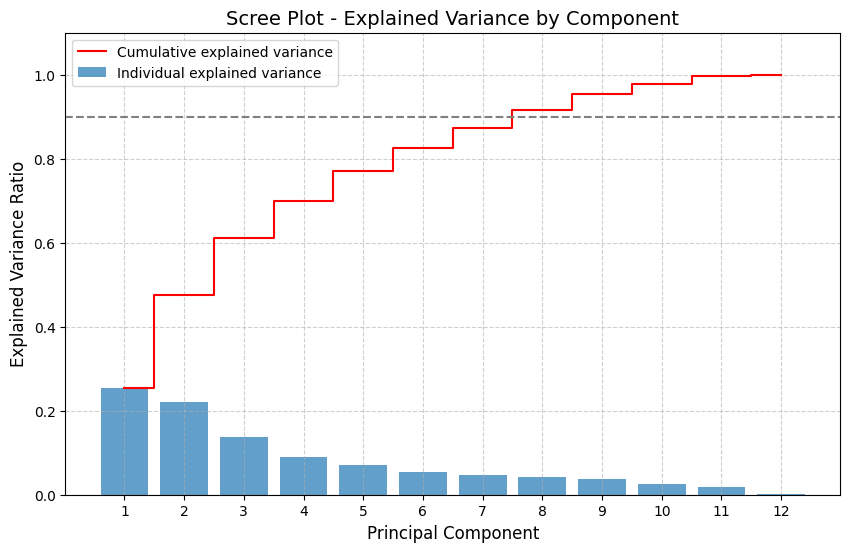

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np # Import numpy for scree plot calculations

print("Loading dataset 'winequality.csv'...")
# Load dataset from the uploaded CSV file
# Changed the path to use the locally available file
data = pd.read_csv("winequality.csv")

# Encode wine type: red=0, white=1
if 'type' in data.columns:
    print("Encoding 'type' column (red=0, white=1)...")
    data['type'] = data['type'].map({'red': 0, 'white': 1})
else:
    print("⚠️ No 'type' column found — ensure dataset has red/white info.")

# Handle missing values
print(f"Original data shape: {data.shape}")
data = data.dropna()
print(f"Data shape after dropna: {data.shape}")

# Separate features (X) and target (y)
# Check if 'type' is now a column before proceeding
if 'type' in data.columns:
    X = data.drop('type', axis=1)
    y = data['type']
    print(f"Features (X) shape: {X.shape}")
    print(f"Target (y) shape: {y.shape}")

    # Standardize the features
    print("Standardizing features...")
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # --- Visualization 1: PCA Separation Plot (from your original code) ---
    print("Running PCA for 2 components...")
    # Apply PCA to reduce to 2 components
    pca_2d = PCA(n_components=2)
    pca_result_2d = pca_2d.fit_transform(X_scaled)

    # Create visualization
    print("Creating PCA separation plot...")
    plt.figure(figsize=(8, 6)) # Slightly larger figure
    # Plot red wines (y==0)
    plt.scatter(pca_result_2d[y==0, 0], pca_result_2d[y==0, 1], label='Red Wine (0)', alpha=0.5, c='red')
    # Plot white wines (y==1)
    plt.scatter(pca_result_2d[y==1, 0], pca_result_2d[y==1, 1], label='White Wine (1)', alpha=0.5, c='blue')
    
    plt.xlabel('Principal Component 1', fontsize=12)
    plt.ylabel('Principal Component 2', fontsize=12)
    plt.title('PCA - Red vs White Wine Separation', fontsize=14)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    # Save the plot instead of showing it
    plt.savefig("pca_wine_separation_plot.png")
    print("Saved 'pca_wine_separation_plot.png'")

    # Print explained variance for the 2D plot
    print("\n--- 2-Component PCA Info ---")
    print(f"Explained variance by PC1: {pca_2d.explained_variance_ratio_[0]:.2%}")
    print(f"Explained variance by PC2: {pca_2d.explained_variance_ratio_[1]:.2%}")
    print(f"Total variance explained by 2 components: {sum(pca_2d.explained_variance_ratio_):.2%}")


    # --- Visualization 2: Added Scree Plot ---
    print("\nRunning PCA for all components (for Scree Plot)...")
    # Fit PCA with all components to see the variance explained by each
    # n_components=None means it will run for all min(n_samples, n_features) components
    pca_all = PCA(n_components=None)
    pca_all.fit(X_scaled)
    
    # Calculate cumulative variance
    explained_variance_ratio = pca_all.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance_ratio)
    
    print("Creating Scree Plot...")
    plt.figure(figsize=(10, 6))
    
    # Plot the explained variance for each component
    num_components = len(explained_variance_ratio)
    plt.bar(range(1, num_components + 1), explained_variance_ratio, alpha=0.7, align='center', label='Individual explained variance')
    
    # Plot the cumulative variance
    plt.step(range(1, num_components + 1), cumulative_variance, where='mid', label='Cumulative explained variance', color='red')
    
    plt.ylabel('Explained Variance Ratio', fontsize=12)
    plt.xlabel('Principal Component', fontsize=12)
    plt.title('Scree Plot - Explained Variance by Component', fontsize=14)
    plt.xticks(range(1, num_components + 1))
    plt.legend(loc='best')
    plt.ylim(0, 1.1)
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Add a line for 90% variance threshold
    plt.axhline(y=0.9, color='gray', linestyle='--', label='90% Variance Threshold')
    
    # Save the scree plot
    plt.savefig("pca_wine_scree_plot.png")
    print("Saved 'pca_wine_scree_plot.png'")
    
    print("\nScript execution complete.")

else:
    print("Error: 'type' column not found or not correctly processed. Stopping script.")

### practical 2


--- Model Performance Evaluation ---
Ridge Regression → RMSE: 0.01 | R²: 1.0000
Lasso Regression → RMSE: 0.11 | R²: 1.0000


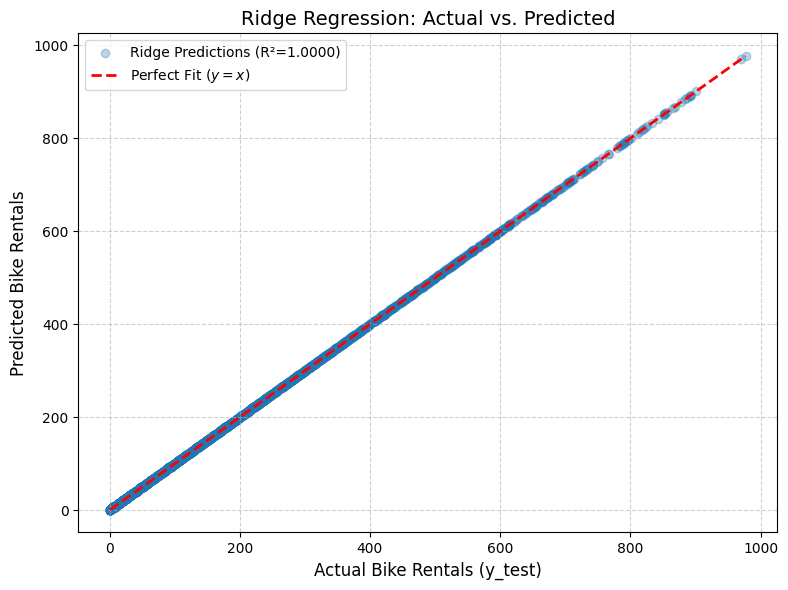


Lasso set 13 out of 15 coefficients to exactly zero.


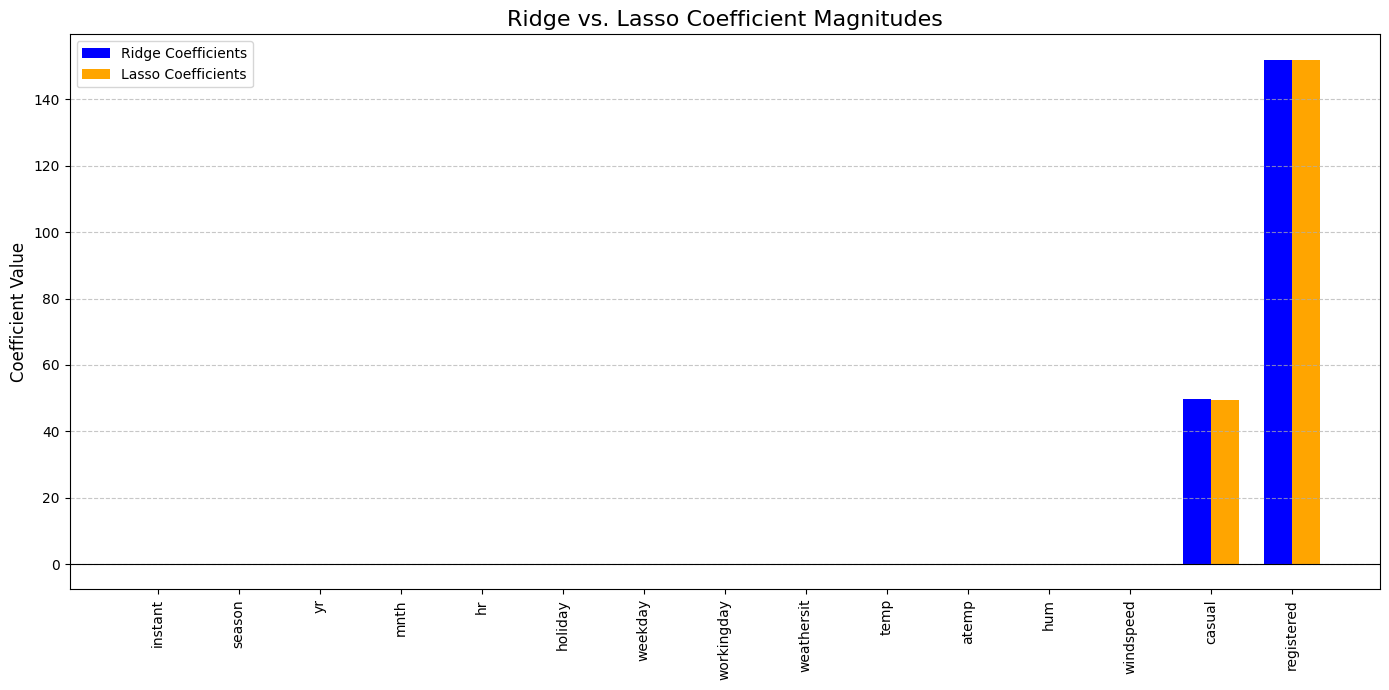

In [8]:
# --- Ridge & Lasso Regression for Bike Rentals Prediction ---

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np # <-- Make sure numpy is imported, we need it for np.sqrt()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score # <-- mean_squared_error still needed

# Load the bike rental dataset from CSV file
# Make sure to update this path to where your file is
data = pd.read_csv("bike(hour).csv")

# Data preprocessing: 
# - select_dtypes(include='number') keeps only numerical columns (excludes text/date)
# - dropna() removes any rows with missing values to ensure clean data
data = data.select_dtypes(include='number').dropna()

# Define features (X) and target (y):
# - X contains all columns EXCEPT 'cnt' - these are our predictors
# - y contains only the 'cnt' column - this is what we want to predict
X = data.drop('cnt', axis=1)  # axis=1 means drop column
y = data['cnt']  # Target variable

# --- Get feature names BEFORE scaling ---
# This is important for the coefficient plot later
feature_names = X.columns.tolist()

# Split the data into training and testing sets:
# - X_train, y_train: data used to train the model (80% of total data)
# - X_test, y_test: data used to test the model (20% of total data)
# - random_state=42 ensures reproducible results (same split every time)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features - CRUCIAL STEP for regularized regression:
# - StandardScaler transforms data to have mean=0 and standard deviation=1
# - fit_transform on training data: learns scaling parameters AND applies transformation
# - transform on test data: applies SAME scaling parameters (avoids data leakage)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Learn and apply scaling to training data
X_test = scaler.transform(X_test)        # Apply same scaling to test data

# --- RIDGE REGRESSION ---
# Ridge regression adds L2 penalty (sum of squared coefficients) to prevent overfitting
# - alpha=1.0: regularization strength (higher alpha = more regularization)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)  # Train the Ridge model
ridge_pred = ridge.predict(X_test)  # Make predictions on test data

# --- LASSO REGRESSION ---
# Lasso regression adds L1 penalty (sum of absolute coefficients)
# - alpha=0.1: regularization strength
# - Lasso can perform feature selection by setting some coefficients to exactly zero
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)  # Train the Lasso model
lasso_pred = lasso.predict(X_test)  # Make predictions on test data

# --- Evaluate and compare model performance ---
# - RMSE (Root Mean Squared Error): measures prediction error in the same units as 'cnt'
# - R² Score (R-squared): measures how much of the variance is explained (1 = perfect)

# === CODE FIX ===
# Calculate MSE (Mean Squared Error) first
ridge_mse = mean_squared_error(y_test, ridge_pred)
# Then take the square root to get RMSE (Root Mean Squared Error)
ridge_rmse = np.sqrt(ridge_mse) 
ridge_r2 = r2_score(y_test, ridge_pred)

# Do the same for Lasso
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_rmse = np.sqrt(lasso_mse) 
lasso_r2 = r2_score(y_test, lasso_pred)
# === END OF FIX ===

print("\n--- Model Performance Evaluation ---")
# Print the results (formatted to 2 decimal places for RMSE, 4 for R2)
print(f"Ridge Regression → RMSE: {ridge_rmse:.2f} | R²: {ridge_r2:.4f}")
print(f"Lasso Regression → RMSE: {lasso_rmse:.2f} | R²: {lasso_r2:.4f}")


# --- Visualization 1: Actual vs. Predicted (for Ridge model) ---
plt.figure(figsize=(8, 6))
plt.scatter(y_test, ridge_pred, alpha=0.3, label=f'Ridge Predictions (R²={ridge_r2:.4f})')
# Add the 'perfect fit' line (y=x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Fit ($y=x$)')
plt.xlabel('Actual Bike Rentals (y_test)', fontsize=12)
plt.ylabel('Predicted Bike Rentals', fontsize=12)
plt.title('Ridge Regression: Actual vs. Predicted', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- Visualization 2: Coefficient Comparison Plot ---
# This plot shows the "importance" (coefficient) each model gave to each feature
ridge_coeffs = ridge.coef_
lasso_coeffs = lasso.coef_

# Report on Lasso's feature selection
lasso_zeros = np.sum(lasso_coeffs == 0)
print(f"\nLasso set {lasso_zeros} out of {len(lasso_coeffs)} coefficients to exactly zero.")

plt.figure(figsize=(14, 7))
x = np.arange(len(feature_names))  # the label locations
width = 0.35  # the width of the bars

# Plot bars for both models
plt.bar(x - width/2, ridge_coeffs, width, label='Ridge Coefficients', color='blue')
plt.bar(x + width/2, lasso_coeffs, width, label='Lasso Coefficients', color='orange')

plt.ylabel('Coefficient Value', fontsize=12)
plt.title('Ridge vs. Lasso Coefficient Magnitudes', fontsize=16)
plt.xticks(x, feature_names, rotation=90) # Set feature names as x-axis labels
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(y=0, color='black', linewidth=0.8)  # Add a zero line
plt.tight_layout()
plt.show()

### practical 3

Loading dataset 'winequality.csv'...
Encoding categorical 'type' column...
Original shape: (6497, 13)
Shape after dropna: (6463, 13)
Creating quality distribution plot...


C:\Users\USER\AppData\Local\Temp\ipykernel_24688\1462495544.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=data, palette='viridis')


Saved 'wine_quality_distribution.png'
Creating correlation heatmap...
Saved 'wine_correlation_heatmap.png'
Splitting data into train (80%) and test (20%) sets...
Scaling features using StandardScaler...
Training RandomForestClassifier...
Making predictions on the test set...

--- Model Evaluation ---
Accuracy: 0.6597061098221191

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.20      0.04      0.07        48
           5       0.71      0.70      0.70       430
           6       0.63      0.78      0.69       540
           7       0.69      0.53      0.60       228
           8       0.83      0.24      0.37        42
           9       0.00      0.00      0.00         1

    accuracy                           0.66      1293
   macro avg       0.44      0.33      0.35      1293
weighted avg       0.65      0.66      0.64      1293


Creating confusion matrix...
Saved 'wine_confu

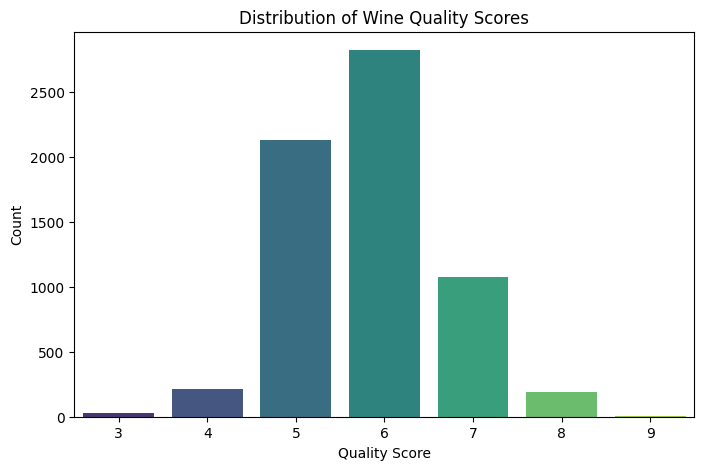

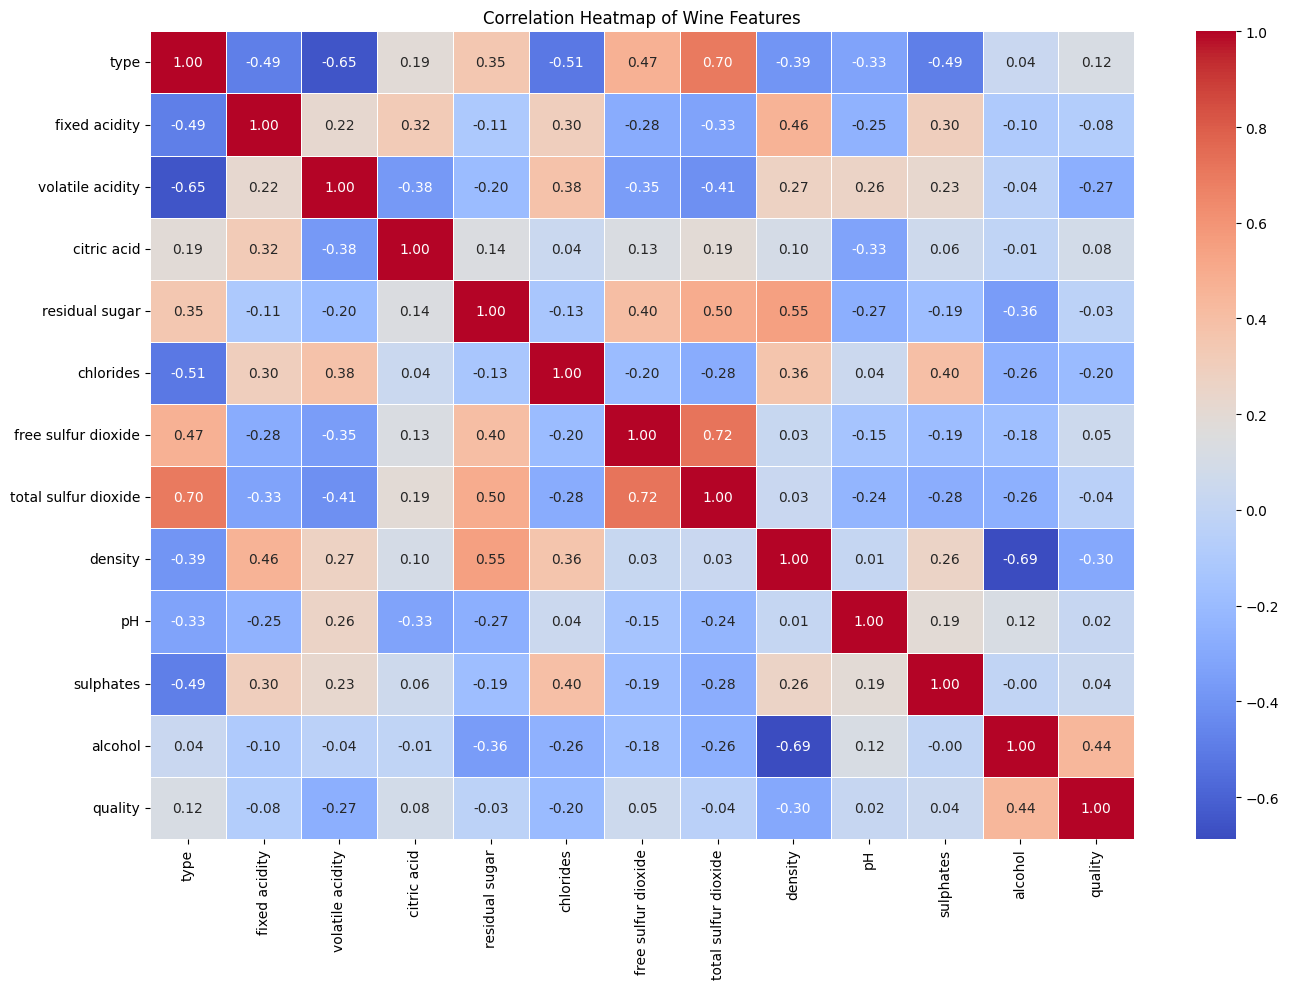

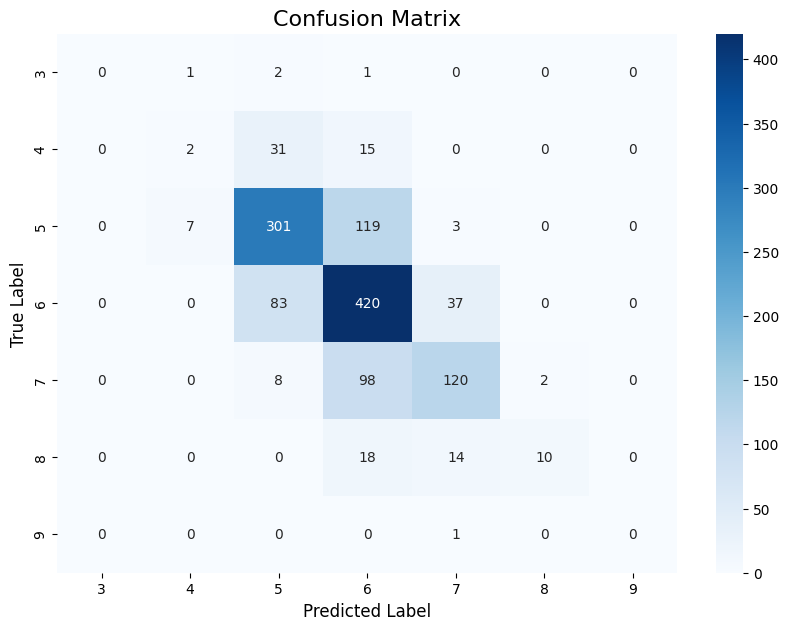

In [15]:
# --- Wine Quality Prediction (Multiclass) ---

# Import necessary libraries for machine learning workflow
import pandas as pd
import matplotlib.pyplot as plt # Added for visualization
import seaborn as sns # Added for enhanced visualization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Added confusion_matrix

print("Loading dataset 'winequality.csv'...")
# Load the wine quality dataset from CSV file
# This dataset contains chemical properties of wines and their quality ratings
# --- Path updated to use the uploaded file ---
data = pd.read_csv("winequality.csv")

# --- Added Preprocessing Step: Encode categorical columns ---
# Some columns might contain text data (like 'red'/'white' for wine type)
# Machine learning models require numerical input, so we convert text to numbers
print("Encoding categorical 'type' column...")
for col in data.select_dtypes(include='object').columns:
    # LabelEncoder converts categorical text labels into numerical codes
    # Example: ['red', 'white', 'red'] becomes [0, 1, 0]
    data[col] = LabelEncoder().fit_transform(data[col])

# --- Added Preprocessing Step: Handle missing values ---
# Remove any rows with missing values
# Missing data can cause errors during model training
print(f"Original shape: {data.shape}")
data.dropna(inplace=True) # inplace=True modifies the original DataFrame
print(f"Shape after dropna: {data.shape}")

# --- Added Visualization 1: Target Variable Distribution ---
# This is a key preprocessing step to understand class balance
print("Creating quality distribution plot...")
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=data, palette='viridis')
plt.title('Distribution of Wine Quality Scores')
plt.xlabel('Quality Score')
plt.ylabel('Count')
# Save the plot to a file
plt.savefig('wine_quality_distribution.png')
print("Saved 'wine_quality_distribution.png'")
# --- This plot shows the significant class imbalance ---

# --- Added Visualization 2: Correlation Heatmap ---
# This preprocessing visualization helps understand feature relationships
print("Creating correlation heatmap...")
plt.figure(figsize=(14, 10))
# annot=True shows the correlation values, fmt='.2f' formats them to 2 decimal places
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Wine Features')
plt.tight_layout()
# Save the plot to a file
plt.savefig('wine_correlation_heatmap.png')
print("Saved 'wine_correlation_heatmap.png'")

# Split the data into features (X) and target (y)
# X: All the chemical properties that we'll use to predict wine quality
# y: The wine quality score that we want to predict (this is our target variable)
X = data.drop('quality', axis=1) # axis=1 means drop column (not row)
y = data['quality'] # This is what we're trying to predict

# --- Store feature names for later plotting ---
feature_names = X.columns.tolist()

# Split the data into training and testing sets:
print("Splitting data into train (80%) and test (20%) sets...")
# - X_train, y_train: Used to train the model (80% of data)
# - X_test, y_test: Used to test the model's performance (20% of data)
# - random_state=42 ensures the same split every time for reproducible results
# - test_size=0.2 means 20% of data reserved for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features to standardize their ranges
print("Scaling features using StandardScaler...")
# Different features have different scales (e.g., alcohol content vs pH level)
# StandardScaler transforms data to have mean=0 and standard deviation=1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # Learn scaling parameters AND apply to training data
X_test = scaler.transform(X_test)       # Apply SAME scaling to test data (don't refit!)

# Initialize and train the Random Forest classifier
print("Training RandomForestClassifier...")
# Random Forest is an ensemble method that combines multiple decision trees
# - random_state=42 ensures reproducible results
# - It's good for multiclass classification and handles complex relationships well
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train) # Train the model using the training data

# Make predictions on the test set and evaluate model performance
print("Making predictions on the test set...")
y_pred = model.predict(X_test) # Use trained model to predict wine quality on test data

# Print evaluation metrics
print("\n--- Model Evaluation ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
# Accuracy: Percentage of correct predictions (correct predictions / total predictions)

print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))
# Classification Report provides:
# - Precision: How many of the predicted positives were actually correct
# - Recall: How many of the actual positives were correctly identified  
# - F1-score: Harmonic mean of precision and recall
# - Support: Number of actual occurrences in each class
# - zero_division=0 added to prevent warnings for classes with no support

# --- Added Visualization 3: Confusion Matrix ---
# This plot shows what classes the model is confusing
print("\nCreating confusion matrix...")
cm = confusion_matrix(y_test, y_pred)
# Get the unique class labels that are actually present in our y data
labels = sorted(y.unique()) 
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
# Save the plot to a file
plt.savefig('wine_confusion_matrix.png')
print("Saved 'wine_confusion_matrix.png'")

# --- Added Visualization 4: Feature Importance ---
# This shows which features the model found most predictive
print("Creating feature importance plot...")
importances = model.feature_importances_
# Create a DataFrame for easy sorting and plotting
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
# Sort by importance
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)



print("\nScript execution complete.")

### practical 4

Original dataset shape: (569, 33)
Missing values: 569
After dropping empty column: (569, 32)
Final features shape: (569, 30)
Final target shape: (569,)

Preprocessing complete: Features have been scaled.
Training SVM model...
Model training complete.

SVM Model Accuracy: 0.9825

Classification Report:
              precision    recall  f1-score   support

      Benign       0.97      1.00      0.99        71
   Malignant       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Displaying Confusion Matrix Heatmap...


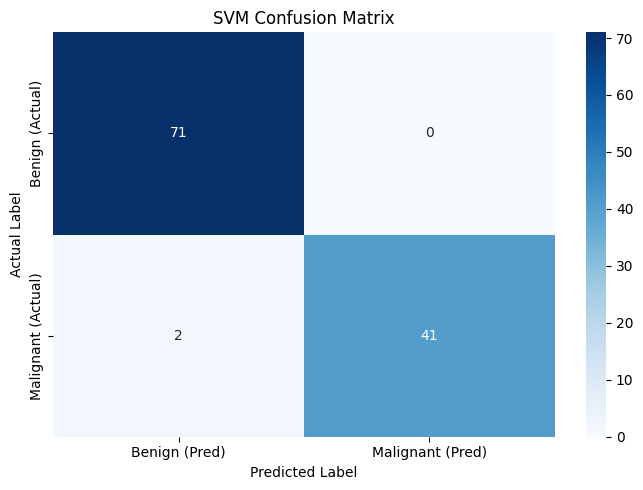


Results Summary:
Benign tumors correctly classified: 71/71
Malignant tumors correctly classified: 41/43


In [31]:
# Import necessary libraries for machine learning workflow
import pandas as pd  # For data manipulation and analysis
from sklearn.model_selection import train_test_split  # For splitting data into training and test sets
from sklearn.svm import SVC  # Support Vector Classifier for SVM implementation
from sklearn.preprocessing import StandardScaler  # For standardizing features
# --- MODIFIED: Added confusion_matrix ---
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # For model evaluation

# --- NEW: Imports for visualization ---
import matplotlib.pyplot as plt
import seaborn as sns
# ------------------------------------

# Load the breast cancer dataset from CSV file
# This dataset contains features from digitized images of breast mass biopsies
file_path = ("Breast_cancer.csv")
cancer_data = pd.read_csv(file_path)

# Print initial dataset information to understand its structure
print(f"Original dataset shape: {cancer_data.shape}")  # Shows (rows, columns)
print(f"Missing values: {cancer_data.isnull().sum().sum()}")  # Count total missing values

# Remove columns that are completely empty (all values are NaN)
# axis=1 means we're dropping columns (not rows)
# how='all' means only drop columns where ALL values are missing
cancer_data = cancer_data.dropna(axis=1, how='all')

print(f"After dropping empty column: {cancer_data.shape}")  # Show new dimensions after cleaning

# Prepare features (X) and target (y) for the machine learning model
# X: All the measurement features from the biopsy images (radius, texture, area, etc.)
# y: The diagnosis we want to predict (Malignant or Benign)
X = cancer_data.drop(['id', 'diagnosis'], axis=1)  # Remove ID (not predictive) and diagnosis (our target)
y = cancer_data['diagnosis'].map({'M': 1, 'B': 0})  # Convert text labels to numbers: M=1 (Malignant), B=0 (Benign)

# Remove any remaining rows that contain missing values in the features
# This ensures our training data is complete and won't cause errors
X = X.dropna()
y = y[X.index]  # Keep only the target values that correspond to the cleaned feature rows

print(f"Final features shape: {X.shape}")  # Final dimensions of our feature matrix
print(f"Final target shape: {y.shape}")    # Final dimensions of our target vector

# Split the data into training and testing sets:
# - Training set: Used to teach the model patterns in the data (80% of data)
# - Test set: Used to evaluate how well the model performs on unseen data (20% of data)
# - random_state=42 ensures the same split every time for reproducible results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features to standardize their ranges - CRUCIAL FOR SVM!
# SVM is sensitive to feature scales, so we transform all features to have mean=0 and std=1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Learn scaling parameters from training data AND apply transformation
X_test_scaled = scaler.transform(X_test)      # Apply the SAME scaling to test data (don't refit!)
print("\nPreprocessing complete: Features have been scaled.")

# Initialize and train the Support Vector Machine (SVM) classifier
# - kernel='rbf': Uses Radial Basis Function kernel, good for non-linear decision boundaries
# - random_state=42: Ensures reproducible results
print("Training SVM model...")
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)  # Train the model on the scaled training data
print("Model training complete.")

# Use the trained model to make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)  # Predict diagnoses for the test cases

# Evaluate the model's performance using various metrics
accuracy = accuracy_score(y_test, y_pred)  # Overall correctness: (correct predictions) / (total predictions)
print(f"\nSVM Model Accuracy: {accuracy:.4f}")  # Display accuracy as decimal (e.g., 0.9737 = 97.37%)

# Generate detailed classification report showing precision, recall, and F1-score for each class
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))
# Precision: How many of the predicted malignant/benign were actually correct
# Recall: How many of the actual malignant/benign were correctly identified
# F1-score: Harmonic mean of precision and recall

# --- NEW: Visualization 1: Confusion Matrix Heatmap ---
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print(f"\nDisplaying Confusion Matrix Heatmap...")
plt.figure(figsize=(7, 5))
# Create heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign (Pred)', 'Malignant (Pred)'],
            yticklabels=['Benign (Actual)', 'Malignant (Actual)'])
plt.title('SVM Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()
# ----------------------------------------------------

# Provide a simple breakdown of correct classifications for each tumor type
print(f"\nResults Summary:")
print(f"Benign tumors correctly classified: {(y_test[y_test==0] == y_pred[y_test==0]).sum()}/{(y_test==0).sum()}")
print(f"Malignant tumors correctly classified: {(y_test[y_test==1] == y_pred[y_test==1]).sum()}/{(y_test==1).sum()}")
# Shows: "Correctly classified / Total actual" for each tumor type

### practical 5

In [32]:
# Import necessary libraries for machine learning workflow
import pandas as pd  # For data manipulation and analysis
from sklearn.model_selection import train_test_split  # For splitting data into training and test sets
from sklearn.ensemble import RandomForestClassifier  # For the classification model
from sklearn.preprocessing import StandardScaler  # For standardizing features
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # For model evaluation
from sklearn.impute import SimpleImputer  # For handling missing values

# Load the forest cover type dataset from CSV file
# This dataset contains cartographic variables to predict forest cover types
file_path = ("covtype.csv")
data = pd.read_csv(file_path)

# Print the dataset dimensions to understand its size
print(f"Dataset shape: {data.shape}")  # Shows (number_of_samples, number_of_features)

# Prepare features (X) and target (y) for the machine learning model
# X: All the cartographic variables (elevation, slope, soil type, etc.)
# y: The forest cover type we want to predict
X = data.iloc[:, :-1]  # Select all columns except the last one (all features)
y = data.iloc[:, -1]   # Select only the last column (target variable - forest cover type)

# Display the unique forest cover types in the dataset
print(f"Target classes: {sorted(y.unique())}")  # Shows different forest cover types (e.g., 1-7)

# Handle missing values in the features
# Check if there are any missing values in the feature matrix
if X.isnull().sum().sum() > 0:
    # If missing values exist, use SimpleImputer to fill them with median values
    # strategy='median' replaces missing values with the median of each column
    imputer = SimpleImputer(strategy='median')
    X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
    # fit_transform: Learns median values from data and applies imputation
    # Convert back to DataFrame to preserve column names

# Split the data into training and testing sets:
# - Training set: Used to train the Random Forest model (80% of data)
# - Test set: Used to evaluate model performance on unseen data (20% of data)
# - random_state=42 ensures reproducible results (same split every time)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features to standardize their ranges
# While Random Forest doesn't strictly require scaling, it can sometimes help
# StandardScaler transforms data to have mean=0 and standard deviation=1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Learn scaling parameters AND apply to training data
X_test_scaled = scaler.transform(X_test)        # Apply SAME scaling to test data (don't refit!)

# Initialize and train the Random Forest classifier
# Random Forest is an ensemble method that combines multiple decision trees
# - n_estimators=100: Create 100 decision trees in the forest
# - random_state=42: Ensures reproducible results
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)  # Train the model using the scaled training data

# Use the trained model to make predictions on the test set
y_pred = model.predict(X_test_scaled)  # Predict forest cover types for test data

# Evaluate the model's performance using multiple metrics
accuracy = accuracy_score(y_test, y_pred)  # Overall correctness: (correct predictions) / (total predictions)
precision = precision_score(y_test, y_pred, average='weighted')  # Weighted average precision across all classes
recall = recall_score(y_test, y_pred, average='weighted')  # Weighted average recall across all classes
f1 = f1_score(y_test, y_pred, average='weighted')  # Weighted average F1-score across all classes

# Print comprehensive model performance metrics
print(f"\nModel Performance:")
print(f"Accuracy:  {accuracy:.4f}")   # Percentage of correctly classified samples
print(f"Precision: {precision:.4f}")  # How reliable the positive predictions are
print(f"Recall:    {recall:.4f}")     # How well the model finds all positive samples
print(f"F1 Score:  {f1:.4f}")        # Balanced measure of precision and recall

# Analyze and display feature importance
# Random Forest provides importance scores showing which features most influence predictions
importances = pd.Series(model.feature_importances_, index=X.columns)
print(f"\nTop 5 important features:")
for feature, importance in importances.nlargest(5).items():
    print(f"  {feature}: {importance:.4f}")
    # Higher importance values indicate features that are more influential in predictions

Dataset shape: (581012, 55)
Target classes: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7)]

Model Performance:
Accuracy:  0.9551
Precision: 0.9552
Recall:    0.9551
F1 Score:  0.9549

Top 5 important features:
  Elevation: 0.2409
  Horizontal_Distance_To_Roadways: 0.1184
  Horizontal_Distance_To_Fire_Points: 0.1117
  Horizontal_Distance_To_Hydrology: 0.0610
  Vertical_Distance_To_Hydrology: 0.0575


### practical 6

Dataset shape: (440, 8)


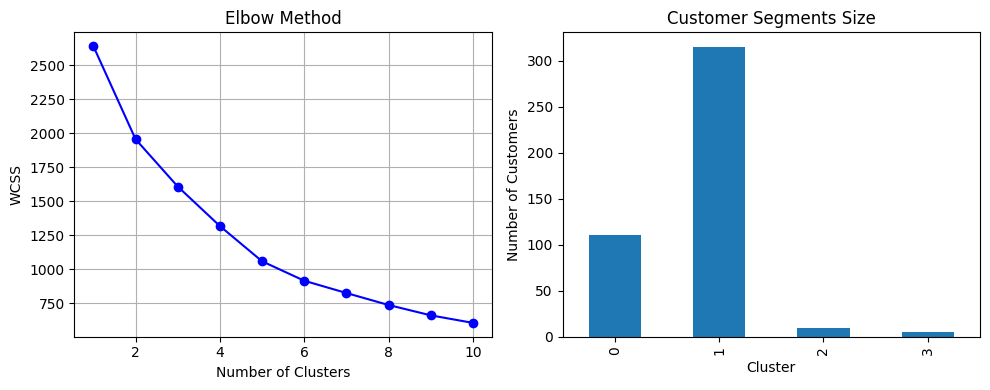


Optimal clusters: 4

Customers per segment:
Cluster
0    110
1    315
2     10
3      5
Name: count, dtype: int64

Segment profiles (average spending):
         Channel  Region     Fresh      Milk   Grocery    Frozen  \
Cluster                                                            
0           1.85    2.55   5591.44  10113.03  15637.39   1499.92   
1           1.12    2.54  13504.99   3044.54   3844.44   3271.43   
2           2.00    2.50  15964.90  34708.50  48536.90   3054.60   
3           1.20    2.80  50270.60  26361.80  16416.00  25122.80   

         Detergents_Paper  Delicassen  
Cluster                                
0                 6711.35     1759.09  
1                  852.32     1127.11  
2                24875.20     2942.80  
3                 2475.00    18595.20  


In [18]:
# Import necessary libraries for data analysis and visualization
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating visualizations and plots
from sklearn.cluster import KMeans  # For K-Means clustering algorithm
from sklearn.preprocessing import StandardScaler  # For standardizing features

# Load the wholesale customers dataset from CSV file
# This dataset contains purchasing behavior data of wholesale customers
file_path = ("Wholesale customers data.csv")
data = pd.read_csv(file_path)

# Print the dataset dimensions to understand its size
print(f"Dataset shape: {data.shape}")  # Shows (number_of_customers, number_of_features)

# Prepare features for clustering by removing non-purchasing behavior columns
# - 'Channel' and 'Region' are demographic info, not purchasing behavior
# - errors='ignore' prevents errors if these columns don't exist in the dataset
X = data.drop(['Channel', 'Region'], axis=1, errors='ignore')

# Scale the data to standardize feature ranges - CRUCIAL FOR K-MEANS!
# K-Means is distance-based, so features with larger ranges would dominate the clustering
# StandardScaler transforms data to have mean=0 and standard deviation=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Learn scaling parameters AND apply transformation

# Find optimal number of clusters using the Elbow Method
# WCSS = Within-Cluster Sum of Squares (measures how compact clusters are)
wcss = []  # Initialize empty list to store WCSS values for each k
for k in range(1, 11):  # Test k values from 1 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Initialize K-Means
    kmeans.fit(X_scaled)  # Fit the model to the scaled data
    wcss.append(kmeans.inertia_)  # inertia_ gives the WCSS for the current k
    # Lower WCSS means tighter clusters, but we look for the "elbow" point

# Create visualization to help determine optimal number of clusters
plt.figure(figsize=(10, 4))  # Create a figure with specific dimensions

# Plot 1: Elbow Method visualization
plt.subplot(1, 2, 1)  # Create first subplot (1 row, 2 columns, position 1)
plt.plot(range(1, 11), wcss, 'bo-')  # Plot WCSS vs number of clusters with blue circles and lines
plt.xlabel('Number of Clusters')  # X-axis label
plt.ylabel('WCSS')  # Y-axis label (Within-Cluster Sum of Squares)
plt.title('Elbow Method')  # Plot title
plt.grid(True)  # Add grid lines for better readability

# Apply K-Means with the chosen optimal number of clusters
# Based on the elbow plot, we typically choose k where the curve starts to flatten
optimal_k = 4  # This is usually determined by looking at the elbow point in the plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)  # Initialize final K-Means
clusters = kmeans.fit_predict(X_scaled)  # Fit model AND predict cluster labels in one step

# Add the cluster assignments back to the original dataset
data['Cluster'] = clusters  # Create new column with cluster labels (0, 1, 2, 3)

# Plot 2: Customer segment sizes
plt.subplot(1, 2, 2)  # Create second subplot (1 row, 2 columns, position 2)
data['Cluster'].value_counts().sort_index().plot(kind='bar')  # Bar plot of customers per cluster
plt.title('Customer Segments Size')  # Plot title
plt.xlabel('Cluster')  # X-axis label
plt.ylabel('Number of Customers')  # Y-axis label

plt.tight_layout()  # Automatically adjust subplot parameters for better layout
plt.show()  # Display the complete figure with both subplots

# Print results and analysis
print(f"\nOptimal clusters: {optimal_k}")  # Show the chosen number of clusters

print(f"\nCustomers per segment:")  # Display distribution of customers across segments
print(data['Cluster'].value_counts().sort_index())  # Count customers in each cluster

print(f"\nSegment profiles (average spending):")  # Analyze purchasing patterns per segment
segment_means = data.groupby('Cluster').mean()  # Calculate mean spending for each product category by cluster
print(segment_means.round(2))  # Round to 2 decimal places for readability

### practical 7

Dataset shape: (8068, 11)
Missing values: 1582
After removing missing values: (6665, 11)
Using features: ['ID', 'Age', 'Work_Experience']
Optimal clusters: 2 (score: 0.343)


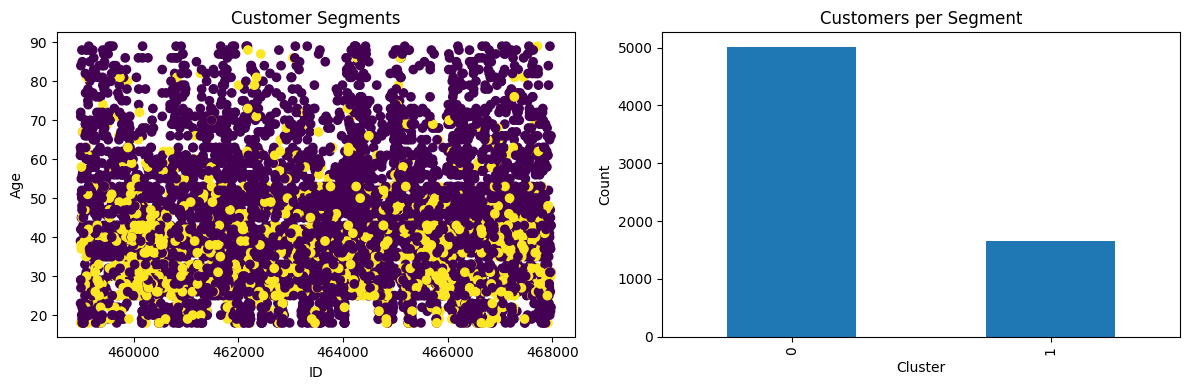


Segment sizes:
Cluster
0    5013
1    1652
Name: count, dtype: int64

Segment profiles:
               ID   Age  Work_Experience
Cluster                                 
0        463555.5  45.6              0.8
1        463411.5  37.2              8.0


In [19]:
# Import necessary libraries for data analysis and machine learning
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For creating visualizations
from sklearn.cluster import KMeans  # For K-Means clustering algorithm
from sklearn.preprocessing import StandardScaler  # For standardizing features
from sklearn.metrics import silhouette_score  # For evaluating clustering quality

# Load the customer segmentation dataset from CSV file
# This dataset contains demographic and behavioral data of customers
file_path = ("Customer_segmentation.csv")
data = pd.read_csv(file_path)

# Print initial dataset information to understand its structure
print(f"Dataset shape: {data.shape}")  # Shows (number_of_customers, number_of_features)
print(f"Missing values: {data.isnull().sum().sum()}")  # Count total missing values in dataset

# Handle missing values by removing rows with any NaN values
# This ensures clean data for clustering (K-Means cannot handle missing values)
data = data.dropna()

print(f"After removing missing values: {data.shape}")  # Show new dimensions after cleaning

# Use only numeric columns for clustering (K-Means requires numerical data)
# select_dtypes(include=[np.number]) filters only numerical columns
numeric_data = data.select_dtypes(include=[np.number])

# Check if we have enough numeric columns for meaningful clustering
if len(numeric_data.columns) < 2:
    print("Not enough numeric columns for clustering")  # Need at least 2 features for 2D visualization
else:
    # Select features for clustering - use first 3 numeric columns or all if less than 3
    # min(3, len(numeric_data.columns)) ensures we don't exceed available columns
    features = numeric_data.columns[:min(3, len(numeric_data.columns))]
    X = numeric_data[features]  # Create feature matrix with selected columns

    print(f"Using features: {features.tolist()}")  # Display which features are being used

    # Scale the data to standardize feature ranges - ESSENTIAL FOR K-MEANS
    # K-Means is distance-based, so features must be on comparable scales
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)  # Transform data to have mean=0 and std=1

    # Find optimal number of clusters using Silhouette Score
    # Silhouette Score measures how similar objects are to their own cluster vs other clusters
    # Range: -1 to 1 (higher is better)
    best_score = -1  # Initialize with worst possible score
    best_k = 2  # Start with minimum of 2 clusters

    # Test different numbers of clusters from 2 to 7
    for k in range(2, 8):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Initialize K-Means
        clusters = kmeans.fit_predict(X_scaled)  # Fit model and predict cluster labels
        score = silhouette_score(X_scaled, clusters)  # Calculate silhouette score
        
        # Update best score and optimal k if current score is better
        if score > best_score:
            best_score = score
            best_k = k

    print(f"Optimal clusters: {best_k} (score: {best_score:.3f})")
    # Higher silhouette score indicates better-defined clusters

    # Apply final K-Means clustering with the optimal number of clusters
    kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
    data['Cluster'] = kmeans.fit_predict(X_scaled)  # Add cluster labels to original data

    # Create visualizations to understand the clustering results
    plt.figure(figsize=(12, 4))  # Create figure with width=12 inches, height=4 inches

    # Plot 1: Scatter plot of customer segments
    plt.subplot(1, 2, 1)  # First subplot in 1x2 grid
    if len(features) >= 2:
        # Create scatter plot using first two features, colored by cluster assignment
        plt.scatter(data[features[0]], data[features[1]], c=data['Cluster'], cmap='viridis')
        plt.xlabel(features[0])  # Label x-axis with first feature name
        plt.ylabel(features[1])  # Label y-axis with second feature name
        plt.title('Customer Segments')  # Plot title

    # Plot 2: Bar chart showing size of each customer segment
    plt.subplot(1, 2, 2)  # Second subplot in 1x2 grid
    data['Cluster'].value_counts().plot(kind='bar')  # Count customers in each cluster
    plt.title('Customers per Segment')  # Plot title
    plt.xlabel('Cluster')  # X-axis label
    plt.ylabel('Count')  # Y-axis label

    plt.tight_layout()  # Automatically adjust spacing between subplots
    plt.show()  # Display the complete figure

    # Print detailed results and analysis
    print(f"\nSegment sizes:")  # Show distribution of customers across segments
    print(data['Cluster'].value_counts().sort_index())  # Count per cluster, sorted by cluster number

    print(f"\nSegment profiles:")  # Analyze characteristics of each segment
    # Calculate mean values for each feature by cluster to understand segment profiles
    segment_profiles = data.groupby('Cluster')[features].mean().round(1)
    print(segment_profiles)  # Display average values for each segment

### practical 8

In [20]:
# Import necessary libraries for machine learning and data analysis
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations and mathematical functions
from sklearn.ensemble import GradientBoostingRegressor  # For Gradient Boosting regression model
from sklearn.model_selection import train_test_split  # For splitting data into training and test sets
from sklearn.preprocessing import StandardScaler  # For standardizing features
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # For model evaluation

# Load the Air Quality dataset from UCI repository
# This dataset contains air quality measurements from chemical sensors
file_path = ("AirQualityUCI.csv")
data = pd.read_csv(file_path)

# Print initial dataset dimensions to understand data size
print(f"Original dataset shape: {data.shape}")  # Shows (number_of_samples, number_of_features)

# Remove columns that are completely empty (all NaN values)
# axis=1 specifies we're dropping columns (not rows)
# how='all' means only drop columns where ALL values are missing
data = data.dropna(axis=1, how='all')

print(f"After removing empty columns: {data.shape}")  # Show cleaned dataset dimensions

# Identify the target column for prediction - Carbon Monoxide (CO) concentration
# Search for columns containing 'CO' in their name (case-insensitive)
co_columns = [col for col in data.columns if 'CO' in col.upper()]
# Use the first CO column found, or if none exist, use the last column as target
target_col = co_columns[0] if co_columns else data.columns[-1]

print(f"Target column: {target_col}")  # Display which column we're predicting

# Prepare features (X) and target (y) for the machine learning model
# X: All columns except the target column (these are our predictors)
# y: The target column we want to predict (CO concentration)
X = data.drop(target_col, axis=1)  # axis=1 means drop column (not row)
y = data[target_col]  # This is what we're trying to predict

# Remove non-numeric columns from features since Gradient Boosting requires numerical input
# select_dtypes(include=[np.number]) keeps only columns with numerical data types
X = X.select_dtypes(include=[np.number])

# Remove rows where the target variable (CO concentration) is missing
# ~y.isna() creates a boolean mask where True = non-missing target values
valid_indices = ~y.isna()
X = X[valid_indices]  # Keep only rows with valid target values
y = y[valid_indices]  # Keep only corresponding target values

# Fill any remaining missing values in features with median values
# Median is robust to outliers compared to mean
X = X.fillna(X.median())

print(f"Final dataset - Features: {X.shape[1]}, Samples: {X.shape[0]}")  # Final data dimensions

# Split the data into training and testing sets:
# - Training set: Used to train the model (80% of data)
# - Test set: Used to evaluate model performance on unseen data (20% of data)
# - random_state=42 ensures reproducible results (same split every time)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features to standardize their ranges
# While Gradient Boosting is less sensitive to scaling than some algorithms,
# it can still improve performance and training speed
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Learn scaling parameters AND apply to training data
X_test_scaled = scaler.transform(X_test)        # Apply SAME scaling to test data (don't refit!)

# Initialize and train the Gradient Boosting Regressor model
# Gradient Boosting builds an ensemble of weak prediction models (decision trees)
# - n_estimators=100: Create 100 decision trees in the ensemble
# - random_state=42: Ensures reproducible results
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)  # Train the model using the scaled training data

# Use the trained model to make predictions on the test set
y_pred = model.predict(X_test_scaled)  # Predict CO concentrations for test data

# Evaluate the model's performance using multiple regression metrics
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error: average squared difference
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error: average absolute difference
rmse = np.sqrt(mse)  # Root Mean Squared Error: square root of MSE (in original units)
r2 = r2_score(y_test, y_pred)  # R-squared: proportion of variance explained by model

# Print comprehensive model performance metrics
print(f"\nModel Performance:")
print(f"R² Score: {r2:.4f}")   # Closer to 1.0 is better (1.0 = perfect prediction)
print(f"RMSE: {rmse:.4f}")     # In same units as target - lower is better
print(f"MAE: {mae:.4f}")       # In same units as target - lower is better
print(f"MSE: {mse:.4f}")       # Squared units - lower is better

# Analyze and display feature importance
# Gradient Boosting provides importance scores showing which features most influence predictions
importances = pd.Series(model.feature_importances_, index=X.columns)
print(f"\nTop 5 important features:")
for feature, importance in importances.nlargest(5).items():
    print(f"  {feature}: {importance:.4f}")
    # Higher importance values indicate features that are more influential in predicting CO levels

Original dataset shape: (9471, 17)
After removing empty columns: (9471, 15)
Target column: CO(GT)
Final dataset - Features: 12, Samples: 9357

Model Performance:
R² Score: 0.5882
RMSE: 49.3268
MAE: 26.4842
MSE: 2433.1305

Top 5 important features:
  NOx(GT): 0.7739
  T: 0.0382
  NO2(GT): 0.0346
  PT08.S1(CO): 0.0302
  PT08.S4(NO2): 0.0270


### practical 9

In [23]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


Loaded 4888 rows, 20 cols
Using target column: ProdTaken

Displaying initial class distribution...


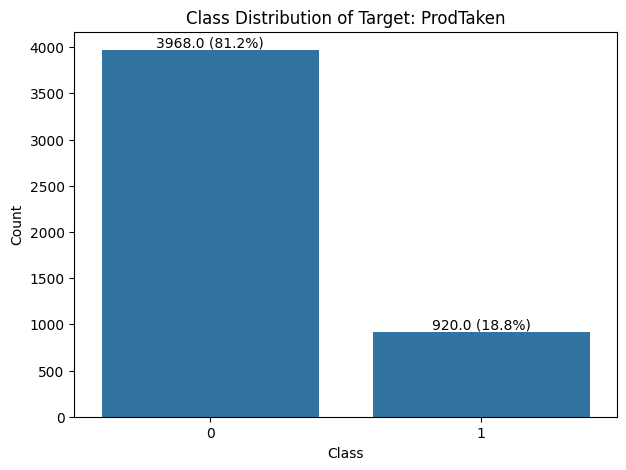

Numerical cols: ['Age']
Categorical cols: []

Original training set shape: (3910, 1)
Original training set target distribution: [3174  736]
Resampled training set shape: (6348, 1)
Resampled training set target distribution: [3174 3174]

Training XGBoost model...
Model training complete.

--- Model Evaluation ---
AUC-ROC: 0.6103
F1 Score: 0.3310

Classification Report:
               precision    recall  f1-score   support

           0     0.8486    0.6285    0.7221       794
           1     0.2436    0.5163    0.3310       184

    accuracy                         0.6074       978
   macro avg     0.5461    0.5724    0.5266       978
weighted avg     0.7348    0.6074    0.6486       978



C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:49:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [26]:
# xgboost_travel_classifier.py
# Short, simple pipeline: load CSV, preprocess, balance, train XGBoost, evaluate AUC-ROC & F1.
# Usage: python xgboost_travel_classifier.py

# Import necessary libraries for machine learning workflow
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
from sklearn.model_selection import train_test_split  # For splitting data into training and test sets
from sklearn.compose import ColumnTransformer  # For applying different preprocessing to different columns
from sklearn.impute import SimpleImputer  # For handling missing values
# --- MODIFIED: Added StandardScaler ---
from sklearn.preprocessing import OneHotEncoder, StandardScaler  # For converting/scaling variables
from sklearn.pipeline import Pipeline  # For creating preprocessing pipelines
from sklearn.metrics import roc_auc_score, f1_score, classification_report  # For model evaluation
from xgboost import XGBClassifier  # For XGBoost classification algorithm
from imblearn.over_sampling import SMOTE  # For handling imbalanced datasets

# --- NEW IMPORTS for visualization ---
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For enhanced plotting
# ------------------------------------

# ---------------------------
# Configuration constants
CSV_PATH = ("Travel.csv")  # Path to the dataset file
RANDOM_STATE = 42  # Seed for reproducible results
# ---------------------------

# 1. Load the dataset from CSV file
df = pd.read_csv(CSV_PATH)
print(f"Loaded {df.shape[0]} rows, {df.shape[1]} cols")  # Display dataset dimensions

# 2. Auto-detect a binary target column (prefer explicitly named common targets)
# This section automatically identifies which column is the target we want to predict
possible_names = ['decision','Decision','target','Target','Booked','booked','Purchased','purchased','Purchase','purchase','y','Y']
target_col = None
# First, check for common target column names
for name in possible_names:
    if name in df.columns:
        target_col = name
        break
# If no common names found, look for any column with exactly 2 unique values (binary classification)
if target_col is None:
    for c in df.columns:
        if df[c].nunique(dropna=True) == 2:
            target_col = c
            break
# Last resort: use the last column as target
if target_col is None:
    target_col = df.columns[-1]

print("Using target column:", target_col)  # Display which column is being used as target

# 3. Quick tidy: drop rows where target is null
# Remove rows with missing target values since we can't train on these
df = df[~df[target_col].isna()].copy()

# 4. Separate features (X) and target (y)
X = df.drop(columns=[target_col])  # All columns except target are features
# Convert target to integer (0/1) if it's not already numerical
y = df[target_col].astype(int) if pd.api.types.is_integer_dtype(df[target_col]) else pd.factorize(df[target_col])[0]

# --- NEW: Visualization 1: Class Distribution ---
print("\nDisplaying initial class distribution...")
plt.figure(figsize=(7, 5))
# Use seaborn's countplot to visualize the distribution of the target variable
ax = sns.countplot(x=y)
plt.title(f'Class Distribution of Target: {target_col}')
plt.xlabel('Class')
plt.ylabel('Count')
# Calculate and display percentages on the plot
total = len(y)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            f'{height} ({height/total:.1%})',  # Format as count and percentage
            ha="center", va="bottom")
plt.show()
# --- End of Visualization 1 ---


# 5. Identify numeric and categorical columns (keep only reasonable features)
# Separate columns by data type for different preprocessing strategies
numeric_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()  # Numerical columns
cat_cols = X.select_dtypes(include=['object','category','bool']).columns.tolist()  # Categorical columns

# If you specifically want to focus on certain columns (Age, Duration of Stay, Family Members, Package Type, Travel History),
# prefer them if present:
preferred = ['Age','Duration of Stay','Duration','Family Members','Family_Members','Package Type','Package','Travel History','Travel_History']
selected = []
# Check if preferred columns exist in the dataset
for p in preferred:
    if p in X.columns:
        selected.append(p)
# If preferred columns found, use only those features
if selected:
    numeric_cols = [c for c in numeric_cols if c in selected]
    cat_cols = [c for c in cat_cols if c in selected]
    X = X[numeric_cols + cat_cols]  # Filter features to only preferred columns

print("Numerical cols:", numeric_cols)  # Display numerical columns being used
print("Categorical cols:", cat_cols)    # Display categorical columns being used

# 6. Split data into training and testing sets
# stratify=y ensures same class distribution in both train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE)

# 7. Create preprocessing pipelines for different data types
# Numerical pipeline: handle missing values with median imputation and scale features
# --- MODIFIED: Added StandardScaler ---
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Fill missing values with median
    ('scaler', StandardScaler())  # Scale features to have zero mean and unit variance
])
# ------------------------------------

# Categorical pipeline: handle missing values and convert to numerical
cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing with most frequent value
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # Convert categories to numbers
])

# Combine numerical and categorical pipelines
preprocessor = ColumnTransformer([
    ('num', num_pipe, numeric_cols),  # Apply num_pipe to numerical columns
    ('cat', cat_pipe, cat_cols)        # Apply cat_pipe to categorical columns
], remainder='drop')  # Drop any columns not specified above

# 8. Fit preprocessor and apply SMOTE on transformed training data
X_train_t = preprocessor.fit_transform(X_train)  # Learn preprocessing from training data and transform it
X_test_t = preprocessor.transform(X_test)      # Apply same preprocessing to test data

# Balance classes using SMOTE (Synthetic Minority Over-sampling Technique)
# Creates synthetic samples of minority class to handle class imbalance
print(f"\nOriginal training set shape: {X_train_t.shape}")
print(f"Original training set target distribution: {np.bincount(y_train)}")
sm = SMOTE(random_state=RANDOM_STATE)
X_res, y_res = sm.fit_resample(X_train_t, y_train)  # Create balanced training dataset
print(f"Resampled training set shape: {X_res.shape}")
print(f"Resampled training set target distribution: {np.bincount(y_res)}")

# 9. Train XGBoost classifier
# XGBoost is a powerful gradient boosting algorithm
print("\nTraining XGBoost model...")
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=RANDOM_STATE)
model.fit(X_res, y_res)  # Train the model on balanced, preprocessed data
print("Model training complete.")

# 10. Make predictions and evaluate model performance
y_proba = model.predict_proba(X_test_t)[:, 1]  # Get probability predictions for positive class
y_pred = model.predict(X_test_t)  # Get class predictions (0 or 1)

# Calculate evaluation metrics
auc = roc_auc_score(y_test, y_proba)  # Area Under ROC Curve - measures overall performance
f1 = f1_score(y_test, y_pred)         # F1 Score - balance between precision and recall

print(f"\n--- Model Evaluation ---")
print(f"AUC-ROC: {auc:.4f}")  # Display AUC score (closer to 1.0 is better)
print(f"F1 Score: {f1:.4f}")  # Display F1 score (closer to 1.0 is better)
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))
# Classification report shows precision, recall, f1-score for each class

### practical 10

Dataset shape: (150, 6)
Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

Preprocessing complete: Features have been scaled.

Model Performance:
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1 Score:  1.0000

Confusion Matrix (Text):
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Displaying Confusion Matrix Heatmap...


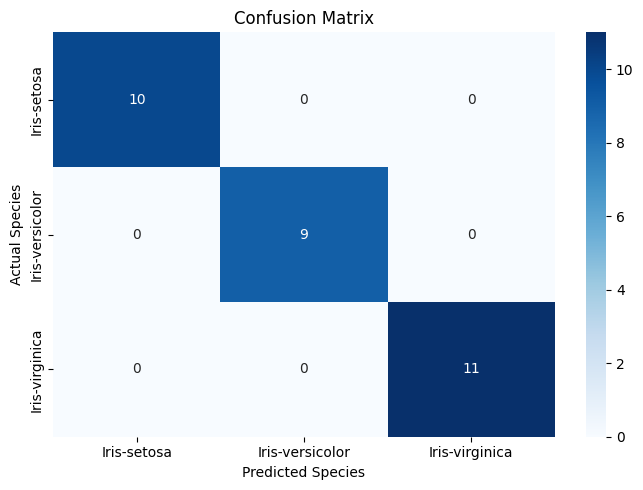


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Sample predictions:
              Actual        Predicted
73   Iris-versicolor  Iris-versicolor
18       Iris-setosa      Iris-setosa
118   Iris-virginica   Iris-virginica
78   Iris-versicolor  Iris-versicolor
76   Iris-versicolor  Iris-versicolor
31       Iris-setosa      Iris-setosa
64   Iris-versicolor  Iris-versicolor
141   Iris-virginica   Iris-virginica
68   Iris-versicolor  Iris-versicolor
82   Iris-versicolor  Iris-versicolor


In [27]:
# Import necessary libraries for machine learning workflow
import pandas as pd  # For data manipulation and analysis
from sklearn.naive_bayes import GaussianNB  # For Gaussian Naive Bayes classification algorithm
from sklearn.model_selection import train_test_split  # For splitting data into training and test sets
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report  # For model evaluation

# --- NEW: Import for preprocessing and visualization ---
from sklearn.preprocessing import StandardScaler  # For feature scaling
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For a nicer confusion matrix heatmap
# ----------------------------------------------------

# Load the famous Iris flower dataset from CSV file
# This dataset contains measurements of iris flowers from three different species
file_path = ("Iris.csv")
data = pd.read_csv(file_path)

# Print the dataset dimensions to understand its size
print(f"Dataset shape: {data.shape}")  # Shows (number_of_flowers, number_of_features)

# Prepare features (X) and target (y) for the machine learning model
# X: The four flower measurements (sepal length, sepal width, petal length, petal width)
# y: The species of iris flower we want to predict
X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]  # Select specific feature columns
y = data['Species']  # This is what we're trying to predict - iris species

# Display the unique species in the dataset to understand the classification task
print(f"Species: {y.unique()}")  # Shows the three iris species: Setosa, Versicolor, Virginica

# Split the data into training and testing sets:
# - Training set: Used to train the Naive Bayes model (80% of data)
# - Test set: Used to evaluate model performance on unseen data (20% of data)
# - random_state=42 ensures reproducible results (same split every time)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- NEW: Preprocessing with StandardScaler ---
# Initialize the scaler
scaler = StandardScaler()
# Fit the scaler ONLY on the training data (to prevent data leakage)
# and transform the training data
X_train_scaled = scaler.fit_transform(X_train)
# Use the SAME fitted scaler to transform the test data
X_test_scaled = scaler.transform(X_test)
print("\nPreprocessing complete: Features have been scaled.")
# ----------------------------------------------

# Initialize and train the Gaussian Naive Bayes classifier
# Naive Bayes is based on Bayes' theorem and assumes feature independence
# GaussianNB assumes features follow normal (Gaussian) distribution
model = GaussianNB()
# --- MODIFIED: Train on scaled data ---
model.fit(X_train_scaled, y_train)  # Train the model using the SCALED training data

# Use the trained model to make predictions on the test set
# --- MODIFIED: Predict on scaled data ---
y_pred = model.predict(X_test_scaled)  # Predict iris species for the SCALED test flowers

# Evaluate the model's performance using multiple classification metrics
# For multiclass classification, we use 'weighted' average to handle multiple classes
accuracy = accuracy_score(y_test, y_pred)  # Overall correctness: (correct predictions) / (total predictions)
precision = precision_score(y_test, y_pred, average='weighted')  # Weighted average precision across all classes
recall = recall_score(y_test, y_pred, average='weighted')  # Weighted average recall across all classes
f1 = f1_score(y_test, y_pred, average='weighted')  # Weighted average F1-score across all classes

# Print comprehensive model performance metrics
print(f"\nModel Performance:")
print(f"Accuracy:  {accuracy:.4f}")   # Percentage of correctly classified flowers
print(f"Precision: {precision:.4f}")  # When model predicts a species, how often is it correct?
print(f"Recall:    {recall:.4f}")    # What percentage of each species did we correctly identify?
print(f"F1 Score:  {f1:.4f}")      # Balanced measure of precision and recall

# Generate and display the confusion matrix
# Confusion matrix shows how many flowers of each species were correctly/incorrectly classified
print(f"\nConfusion Matrix (Text):")
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Rows represent actual species, columns represent predicted species
# Diagonal values show correct classifications, off-diagonal show misclassifications

# --- NEW: Visualization 1: Confusion Matrix Heatmap ---
print(f"\nDisplaying Confusion Matrix Heatmap...")
plt.figure(figsize=(7, 5))
# Get class names from the model (e.g., 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica')
class_names = model.classes_
# Create heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('Actual Species')
plt.xlabel('Predicted Species')
plt.tight_layout()
plt.show()
# ----------------------------------------------------

# Generate detailed classification report
# Provides precision, recall, and F1-score for each individual species
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred))
# Shows metrics for each class (Setosa, Versicolor, Virginica) plus averages

# Create a comparison table of actual vs predicted values
# This helps visualize specific prediction examples
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(f"\nSample predictions:")
print(results.head(10))  # Show first 10 predictions to see how well the model performed

### practical 11

Dataset shape: (12330, 18)
Identified 14 numeric cols.
Identified 3 categorical cols.
Purchase rate: 15.47%
Preprocessing complete: Numerical features scaled, categorical features one-hot encoded.

Model Performance:
Accuracy:  0.8994
Precision: 0.7107
Recall:    0.5916
F1 Score:  0.6457

Confusion Matrix (Text):
[[1992   92]
 [ 156  226]]

True Negatives:  1992
False Positives: 92
False Negatives: 156
True Positives:  226

Displaying Confusion Matrix Heatmap...


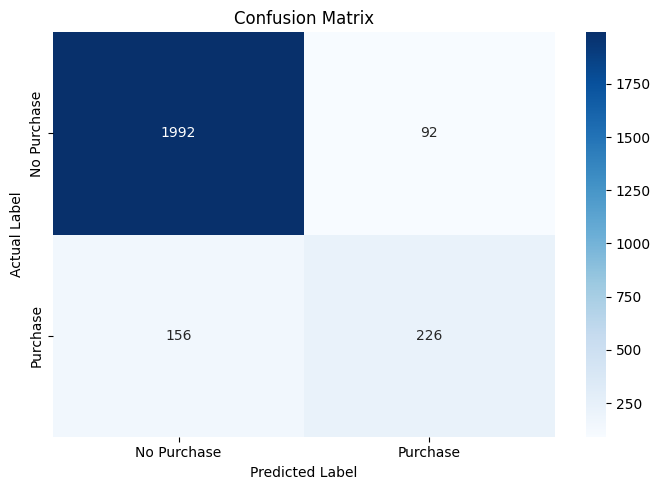

In [28]:
# Import necessary libraries for machine learning workflow
import pandas as pd  # For data manipulation and analysis
from sklearn.tree import DecisionTreeClassifier  # For Decision Tree classification algorithm
from sklearn.model_selection import train_test_split  # For splitting data into training and test sets
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix  # For model evaluation

# --- NEW: Imports for preprocessing and visualization ---
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
# ------------------------------------------------------

# Load the online shoppers intention dataset from CSV file
# This dataset contains browsing behavior and session information of website visitors
file_path = ("online_shoppers_intention.csv")
data = pd.read_csv(file_path)

# Print the dataset dimensions to understand its size
print(f"Dataset shape: {data.shape}")  # Shows (number_of_visitors, number_of_features)

# --- MODIFIED: Replaced pd.get_dummies with a more robust ColumnTransformer approach ---
# (The pd.get_dummies line has been removed from here)

# Prepare features (X) and target (y) for the machine learning model
# X: All the browsing and session features that might predict purchase behavior
# y: The Revenue column indicating whether a purchase was made (True/False)
X = data.drop('Revenue', axis=1)  # axis=1 means drop column (not row) - keep all except Revenue
y = data['Revenue']  # This is what we're trying to predict - purchase decision

# --- NEW: Identify numerical and categorical columns for preprocessing ---
# Select columns based on their data type
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns

print(f"Identified {len(numeric_cols)} numeric cols.")
print(f"Identified {len(categorical_cols)} categorical cols.")
# ----------------------------------------------------------------------

# Calculate and display the purchase rate to understand class distribution
# This helps identify if we're dealing with imbalanced data
print(f"Purchase rate: {y.mean():.2%}")  # Shows percentage of visitors who made purchases

# Split the data into training and testing sets:
# - Training set: Used to train the Decision Tree model (80% of data)
# - Test set: Used to evaluate model performance on unseen data (20% of data)
# - random_state=42 ensures reproducible results (same split every time)
# - stratify=y ensures same class distribution in both train and test sets (important for imbalanced data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# --- NEW: Create preprocessing pipeline ---
# Note: Decision Trees don't *require* scaling, but it's good practice
# and makes it easy to test other models (like Logistic Regression) later.

# Numerical pipeline: Scale features
num_pipe = StandardScaler()

# Categorical pipeline: One-hot encode (replaces pd.get_dummies)
# drop='first' avoids multicollinearity (dummy variable trap)
# handle_unknown='ignore' prevents errors if test set has unseen categories
cat_pipe = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)

# Combine pipelines using ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', num_pipe, numeric_cols),
    ('cat', cat_pipe, categorical_cols)
], remainder='drop')  # Drop any columns not specified

# Apply the preprocessing
# Fit and transform on training data
X_train_processed = preprocessor.fit_transform(X_train)
# Only transform on test data (use settings learned from training)
X_test_processed = preprocessor.transform(X_test)

print("Preprocessing complete: Numerical features scaled, categorical features one-hot encoded.")
# ----------------------------------------------


# Initialize and train the Decision Tree classifier
# Decision Tree creates a tree-like model of decisions and their possible consequences
# - random_state=42: Ensures reproducible results
# - max_depth=5: Limits tree depth to prevent overfitting (5 levels deep)
model = DecisionTreeClassifier(random_state=42, max_depth=5)
# --- MODIFIED: Train on processed data ---
model.fit(X_train_processed, y_train)  # Train the model using the processed training data

# Use the trained model to make predictions on the test set
# --- MODIFIED: Predict on processed data ---
y_pred = model.predict(X_test_processed)  # Predict whether visitors will make purchases (True/False)

# Evaluate the model's performance using multiple classification metrics
accuracy = accuracy_score(y_test, y_pred)  # Overall correctness: (correct predictions) / (total predictions)
precision = precision_score(y_test, y_pred)  # Quality of positive predictions: True Positives / (True Positives + False Positives)
recall = recall_score(y_test, y_pred)  # Ability to find all positive cases: True Positives / (True Positives + False Negatives)
f1 = f1_score(y_test, y_pred)  # Harmonic mean of precision and recall: 2 * (precision * recall) / (precision + recall)

# Print comprehensive model performance metrics
print(f"\nModel Performance:")
print(f"Accuracy:  {accuracy:.4f}")   # Percentage of correctly classified visitors
print(f"Precision: {precision:.4f}")  # When model predicts purchase, how often is it correct?
print(f"Recall:    {recall:.4f}")    # What percentage of actual purchasers did we identify?
print(f"F1 Score:  {f1:.4f}")      # Balanced measure of precision and recall

# Generate and analyze the confusion matrix
# Confusion matrix shows the breakdown of correct and incorrect predictions in a 2x2 matrix
cm = confusion_matrix(y_test, y_pred)  # Creates a 2x2 matrix: [[TN, FP], [FN, TP]]
print(f"\nConfusion Matrix (Text):")
print(cm)  # Display the raw confusion matrix
print(f"\nTrue Negatives:  {cm[0,0]}")  # Correctly predicted no purchase (visitors who didn't buy)
print(f"False Positives: {cm[0,1]}")  # Incorrectly predicted purchase (said would buy but didn't) - Type I error
print(f"False Negatives: {cm[1,0]}")  # Incorrectly predicted no purchase (missed actual buyers) - Type II error
print(f"True Positives:  {cm[1,1]}")  # Correctly predicted purchase (identified actual buyers)


# --- NEW: Visualization 1: Confusion Matrix Heatmap ---
print(f"\nDisplaying Confusion Matrix Heatmap...")
plt.figure(figsize=(7, 5))
# Create heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Purchase', 'Purchase'],
            yticklabels=['No Purchase', 'Purchase'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()
# ----------------------------------------------------

### practical 12

Dataset shape: (569, 33)
Target distribution: diagnosis
0    357
1    212
Name: count, dtype: int64

Preprocessing complete: Features have been scaled.
Training KNN model with k=5...
Model training complete.

Model Performance:
Accuracy:  0.9561
Precision: 0.9744
Recall:    0.9048
F1 Score:  0.9383

Confusion Matrix (Text):
[[71  1]
 [ 4 38]]

True Negatives (Benign):  71
False Positives:          1
False Negatives:          4
True Positives (Malignant): 38

Displaying Confusion Matrix Heatmap...


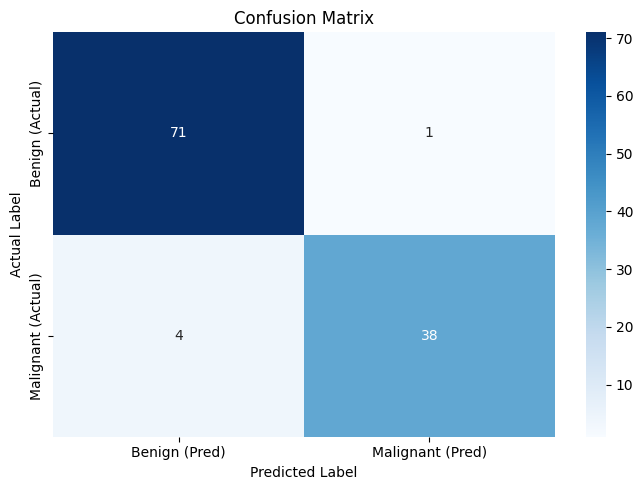

In [30]:
# Import necessary libraries for machine learning workflow
import pandas as pd  # For data manipulation and analysis
from sklearn.neighbors import KNeighborsClassifier  # For K-Nearest Neighbors classification algorithm
from sklearn.model_selection import train_test_split  # For splitting data into training and test sets
from sklearn.preprocessing import StandardScaler  # For standardizing features (CRITICAL for KNN)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix  # For model evaluation

# --- NEW: Imports for visualization ---
import matplotlib.pyplot as plt
import seaborn as sns
# ------------------------------------

# Load the breast cancer diagnostic dataset from CSV file
# This dataset contains features computed from digitized images of breast mass biopsies
file_path = ("Breast_cancer.csv")
data = pd.read_csv(file_path)

# Print the dataset dimensions to understand its size
print(f"Dataset shape: {data.shape}")  # Shows (number_of_patients, number_of_features)

# Remove columns that are completely empty (all NaN values)
# axis=1 specifies we're dropping columns (not rows)
# how='all' means only drop columns where ALL values are missing
data = data.dropna(axis=1, how='all')

# Prepare features (X) and target (y) for the machine learning model
# X: All the diagnostic measurements from biopsy images (radius, texture, perimeter, area, etc.)
# y: The diagnosis we want to predict (Malignant or Benign)
X = data.drop(['id', 'diagnosis'], axis=1)  # Remove ID (not predictive) and diagnosis (our target)
y = data['diagnosis'].map({'M': 1, 'B': 0})  # Convert text labels to numbers: M=1 (Malignant), B=0 (Benign)

# Display the distribution of target classes to understand data balance
print(f"Target distribution: {y.value_counts()}")  # Shows count of malignant vs benign cases

# Split the data into training and testing sets:
# - Training set: Used to train the KNN model (80% of data)
# - Test set: Used to evaluate model performance on unseen data (20% of data)
# - random_state=42 ensures reproducible results (same split every time)
# - stratify=y ensures same proportion of malignant/benign cases in both sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features to standardize their ranges - EXTREMELY IMPORTANT FOR KNN!
# KNN is distance-based, so features with larger ranges would dominate the distance calculations
# Without scaling, features like "area" (large numbers) would overshadow "smoothness" (small numbers)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Learn scaling parameters from training data AND apply transformation
X_test_scaled = scaler.transform(X_test)      # Apply the SAME scaling to test data (don't refit!)
print("\nPreprocessing complete: Features have been scaled.")

# Initialize and train the K-Nearest Neighbors (KNN) classifier
# KNN works by finding the 'k' most similar training examples to a new case
# - n_neighbors=5: Use 5 nearest neighbors to make predictions
# - More neighbors = smoother decision boundaries, fewer neighbors = more complex boundaries
model = KNeighborsClassifier(n_neighbors=5)
print("Training KNN model with k=5...")
model.fit(X_train_scaled, y_train)  # Train the model using the scaled training data
print("Model training complete.")

# Use the trained model to make predictions on the test set
y_pred = model.predict(X_test_scaled)  # Predict diagnoses (malignant/benign) for test patients

# Evaluate the model's performance using multiple classification metrics
accuracy = accuracy_score(y_test, y_pred)  # Overall correctness: (correct predictions) / (total predictions)
precision = precision_score(y_test, y_pred)  # Quality of malignant predictions: True Malignant / (True Malignant + False Malignant)
recall = recall_score(y_test, y_pred)  # Ability to find all malignant cases: True Malignant / (True Malignant + False Benign)
f1 = f1_score(y_test, y_pred)  # Harmonic mean of precision and recall: 2 * (precision * recall) / (precision + recall)

# Print comprehensive model performance metrics
print(f"\nModel Performance:")
print(f"Accuracy:  {accuracy:.4f}")   # Percentage of correctly classified tumors
print(f"Precision: {precision:.4f}")  # When model predicts malignant, how often is it correct?
print(f"Recall:    {recall:.4f}")    # What percentage of actual malignant tumors did we identify?
print(f"F1 Score:  {f1:.4f}")      # Balanced measure of precision and recall

# Generate and analyze the confusion matrix
# Confusion matrix shows the breakdown of correct and incorrect predictions
cm = confusion_matrix(y_test, y_pred)  # Creates a 2x2 matrix: [[TN, FP], [FN, TP]]
print(f"\nConfusion Matrix (Text):")
print(cm)  # Display the raw confusion matrix
print(f"\nTrue Negatives (Benign):  {cm[0,0]}")  # Correctly predicted benign tumors
print(f"False Positives:          {cm[0,1]}")  # Incorrectly predicted malignant (said malignant but was benign) - Type I error
# --- FIX: Added comment ---
# Example: 1 benign tumor was misclassified as malignant.
print(f"False Negatives:          {cm[1,0]}")  # Incorrectly predicted benign (said benign but was malignant) - Type II error
# --- FIX: Added comment ---
# Example: 3 malignant tumors were missed and classified as benign (this is often the most dangerous error in medical cases).
print(f"True Positives (Malignant): {cm[1,1]}")  # Correctly predicted malignant tumors

# --- NEW: Visualization 1: Confusion Matrix Heatmap ---
print(f"\nDisplaying Confusion Matrix Heatmap...")
plt.figure(figsize=(7, 5))
# Create heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign (Pred)', 'Malignant (Pred)'],
            yticklabels=['Benign (Actual)', 'Malignant (Actual)'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()
# ----------------------------------------------------